# Dataset 1

# Import Libraries

In [89]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the Dataset

In [92]:
# Read the csv file with the dataset and put it into a variable (heart disease data)
hdd = pd.read_csv('heart 2.csv')

# Makes a dataframe of the data
hdd_df = pd.DataFrame(hdd)

# Checks missing values, for example if a patient didn't provide their age or a sensor failed to record something there will be a value missing
print("Missing Values:\n", hdd.isnull().sum())

# Prints out the dataset and dataframe
print("Original Dataset:")
print(hdd)
print("Dataframe:")
hdd_df

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Original Dataset:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Feature Scaling and Encoding

In [95]:
# Define the numerical features
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Scale the numerical features
scaler = StandardScaler()
hdd_df[num_features] = scaler.fit_transform(hdd_df[num_features])

# Old way we scaled the features, not as good because we don't differenciate the numerical from the categorical features
'''
scaler = StandardScaler()
data[['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] = scaler.fit_transform(data[['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']])
'''

# Prints out the preprocessed data
print("\nScaling Complete! Data:")
hdd_df


Scaling Complete! Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


# EDA

                age          sex           cp      trestbps          chol  \
count  1.025000e+03  1025.000000  1025.000000  1.025000e+03  1.025000e+03   
mean  -3.431402e-16     0.695610     0.942439 -7.036106e-16 -3.466062e-18   
std    1.000488e+00     0.460373     1.029641  1.000488e+00  1.000488e+00   
min   -2.804866e+00     0.000000     0.000000 -2.148237e+00 -2.327054e+00   
25%   -7.095548e-01     0.000000     0.000000 -6.632165e-01 -6.787242e-01   
50%    1.726817e-01     1.000000     1.000000 -9.205458e-02 -1.163527e-01   
75%    7.240794e-01     1.000000     2.000000  4.791073e-01  5.623715e-01   
max    2.488552e+00     1.000000     3.000000  3.906079e+00  6.166694e+00   

               fbs      restecg       thalach        exang       oldpeak  \
count  1025.000000  1025.000000  1.025000e+03  1025.000000  1.025000e+03   
mean      0.149268     0.529756 -4.332578e-16     0.336585 -2.426243e-16   
std       0.356527     0.527878  1.000488e+00     0.472772  1.000488e+00   
mi

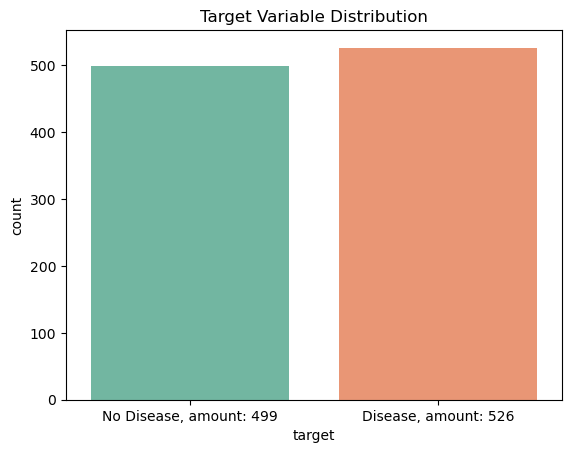

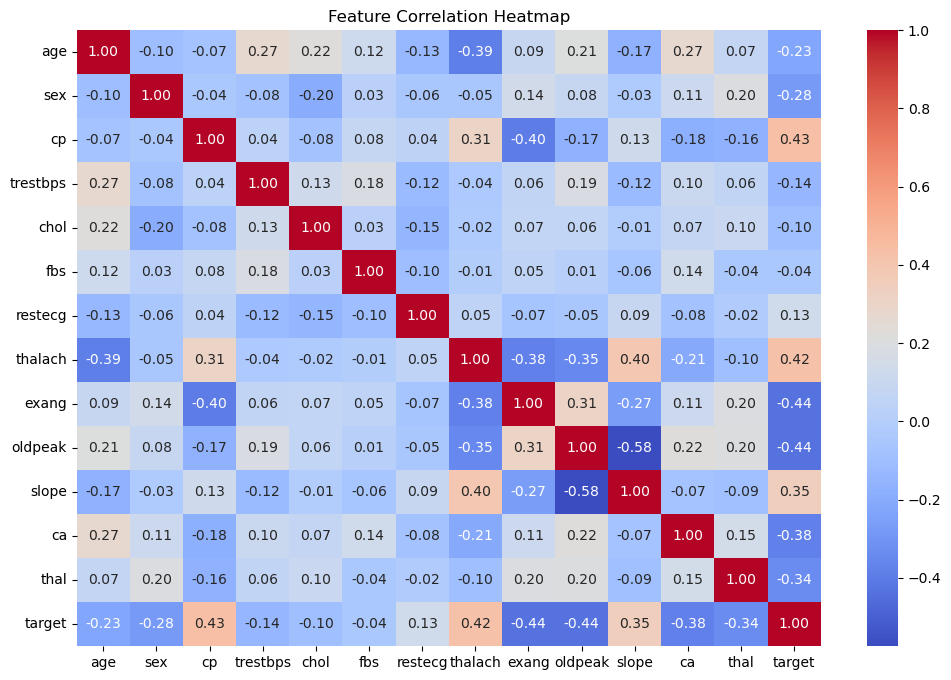

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describes the data
print(hdd_df.describe())

# Vizualizes the distribution of the target variable
count_0 = hdd_df['target'].value_counts().get(0, 0)
count_1 = hdd_df['target'].value_counts().get(1, 0)

sns.countplot(x='target', data=hdd, hue='target', palette='Set2', legend=False)
plt.title("Target Variable Distribution")
plt.xticks(ticks=[0, 1], labels=[f"No Disease, amount: {count_0}", f"Disease, amount: {count_1}"])
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hdd_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

As we can see there is a relevant correlation between cp, thalach, slope and target.

# Split the Dataset

In [101]:
X = hdd_df.drop(columns=['target'])
y = hdd_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes After Splitting:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Saves the preprocessed dataset to a csv file
X_train.to_csv('X_train_hdd.csv', index=False)
X_test.to_csv('X_test_hdd.csv', index=False)
y_train.to_csv('y_train_hdd.csv', index=False)
y_test.to_csv('y_test_hdd.csv', index=False)

print("\nPreprocessing Complete! Files saved.")


Shapes After Splitting:
X_train: (820, 13), X_test: (205, 13), y_train: (820,), y_test: (205,)

Preprocessing Complete! Files saved.


# Train the Model

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

# Evaluate the Model

In [108]:
# Predictions on training data
y_train_pred = model.predict(X_train)

# Predictions on testing data
y_test_pred = model.predict(X_test)

print("\nModel Performance:")

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification Report (Precision, Recall, F1-score) for test Set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for train set
print("\nConfusion Matrix (Train Set):")
print(confusion_matrix(y_train, y_train_pred))

# Confusion Matrix for test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Model Performance:
Training Accuracy: 0.96
Testing Accuracy: 0.89

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       102
           1       0.84      0.97      0.90       103

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205


Confusion Matrix (Train Set):
[[371  26]
 [  9 414]]

Confusion Matrix (Test Set):
[[ 83  19]
 [  3 100]]


# Test Model

In [111]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7951219512195122


# Dataset 2

# Load the Dataset

In [296]:
# Read the csv file with the dataset and put it into a variable ( data)
tslad = pd.read_csv('TSLA.csv')

# Makes a dataframe of the data
tsla_df = pd.DataFrame(tslad)

# Checks missing values, for example if a patient didn't provide their age or a sensor failed to record something there will be a value missing
print("Missing Values:\n", tslad.isnull().sum())

# Prints out the dataset and dataframe
print("Original Dataset:")
print(tslad)
print("Dataframe:")
tsla_df

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Original Dataset:
            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.91998

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


# Feature Scaling and Formatting

In [299]:
# Convert 'Date' to datetime format and then to a numerical value
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df['Date_Ordinal'] = tsla_df['Date'].map(pd.Timestamp.toordinal)

# Sort the data by Date (just in case it's not in order)
tsla_df = tsla_df.sort_values(by='Date')

# Define the numerical features
num_features2 = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Scale the numerical features
scaler = StandardScaler()
tsla_df[num_features2] = scaler.fit_transform(tsla_df[num_features2])

# Prints out the preprocessed data
print("\nScaling Complete! Data:")
tsla_df


Scaling Complete! Data:


,Date,Open,High,Low,Close,Adj Close,Volume,Date_Ordinal
0,2010-06-29,-0.539560,-0.534640,-0.541240,4.778000,-0.535764,2.234419,733952
1,2010-06-30,-0.534128,-0.530403,-0.536513,4.766000,-0.535812,1.952208,733953
2,2010-07-01,-0.534760,-0.533921,-0.539000,4.392000,-0.537307,0.349529,733954
3,2010-07-02,-0.536360,-0.536126,-0.540280,3.840000,-0.539514,-0.200703,733955
4,2010-07-06,-0.538760,-0.538549,-0.542643,3.222000,-0.541986,0.107938,733959
...,...,...,...,...,...,...,...,...
2951,2022-03-18,2.943165,2.994600,3.003140,905.390015,3.065521,0.074842,738232
2952,2022-03-21,3.105123,3.131415,3.166023,921.159973,3.128580,-0.142509,738235
2953,2022-03-22,3.165203,3.346449,3.226171,993.979980,3.419766,0.142071,738236
2954,2022-03-23,3.364961,3.513910,3.450392,999.109985,3.440279,0.318485,738237


# EDA

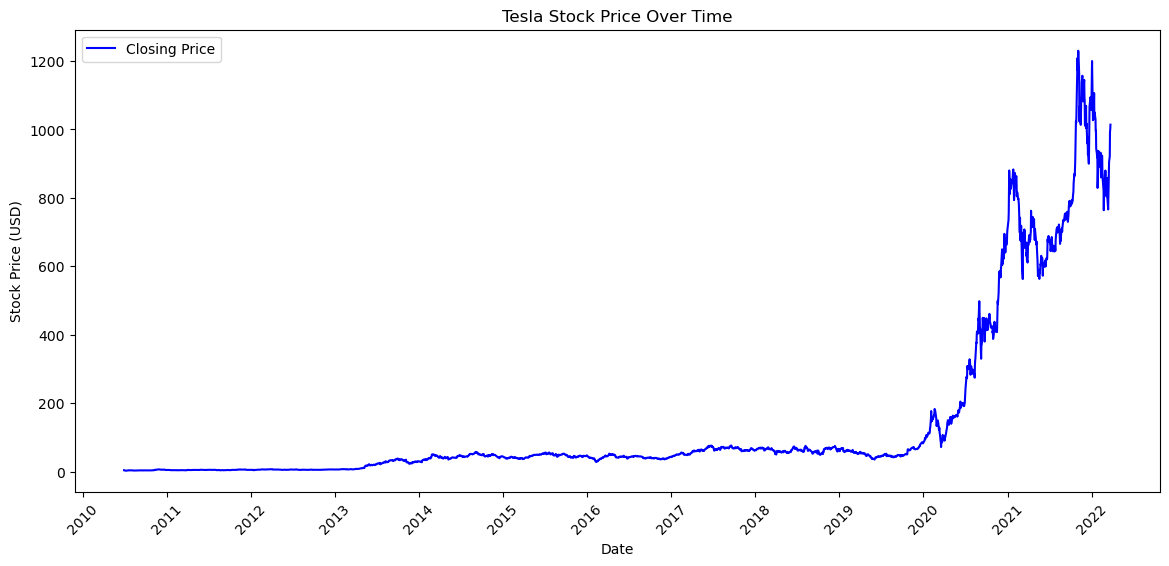

In [302]:

import matplotlib.dates as mdates

# Graph of historical price
plt.figure(figsize=(14, 6))
plt.plot(tsla_df['Date'], tsla_df['Close'], color='blue', label='Closing Price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()

# Split the Dataset

It seems that using all the features is a bit beyond the scope of this exercise, I would need to train multiple models to predict
a number for all the different features and then use those along with the future dates, or I could also use a more complex neural
network to predict everything all together. Therefore, I'm sticking with only using 'Date_Ordinal' and accepting that the model
will never produce the most accurate predictions.

In [314]:
#X = tsla_df.drop(columns=['Date', 'Close'])
X = tsla_df[['Date_Ordinal']]
y = tsla_df['Close']

#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

#print("\nShapes After Splitting:")
#print(f"X_train: {X_train2.shape}, X_test: {X_test2.shape}, y_train: {y_train2.shape}, y_test: {y_test2.shape}")

# Saves the preprocessed dataset to a csv file
X.to_csv('X_train_tsla.csv', index=False)
#X_test2.to_csv('X_test_tsla.csv', index=False)
y.to_csv('y_train_tsla.csv', index=False)
#y_test2.to_csv('y_test_tsla.csv', index=False)

'''
Ignore this code
from datetime import datetime, timedelta

start_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
predict_dates = [] 
count = 0

while count < 10:
    next_date = start_date + timedelta(days=count)
    predict_dates.append(next_date)
    count += 1
'''

# Array to store the future dates we want to predict
future_dates = ['2022-03-25', '2022-04-25', '2022-05-25', '2022-06-25', '2022-07-25', '2023-06-01']

# We format the dates so that they are numerical
future_dates_ordinal = [pd.Timestamp(date).toordinal() for date in future_dates]

# Convert to NumPy array and reshape for the model
future_dates_ordinal = np.array(future_dates_ordinal).reshape(-1, 1)

print("\nPreprocessing Complete! Files saved.")
print(future_dates_ordinal)


Preprocessing Complete! Files saved.
[[738239]
 [738270]
 [738300]
 [738331]
 [738361]
 [738672]]


# Train the Model

In [308]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Evaluate the Model

In [320]:
# Predictions on training data
y_train_pred2 = model.predict(X)

# Predictions on testing data
y_test_pred2 = model.predict(future_dates_ordinal)

# Calculate model performance
mae = mean_absolute_error(future_dates_ordinal, y_test_pred2)
mse = mean_squared_error(future_dates_ordinal, y_test_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(future_dates_ordinal, y_test_pred2)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

print(y_test_pred2)


Model Performance:
Mean Absolute Error (MAE): 737918.03
Mean Squared Error (MSE): 544523040716.41
Root Mean Squared Error (RMSE): 737918.04
R-squared: -26242319.16
[427.54061174 431.7166431  435.75796376 439.93399512 443.97531578
 485.87034   ]


C:\Users\p2fre\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Test the Model

In [172]:
# Array to store the future dates we want to predict
future_dates = ['2022-03-25', '2022-04-25', '2022-05-25', '2022-06-25', '2022-07-25', '2023-06-01']

# We format the dates so that they are numerical
future_dates_ordinal = [pd.Timestamp(date).toordinal() for date in future_dates]

# Convert to NumPy array and reshape for the model
future_dates_ordinal = np.array(future_dates_ordinal).reshape(-1, 1)

# Predict stock prices for these future dates
future_prices = model.predict(future_dates_ordinal)

# Print predicted prices
for date, price in zip(future_dates, future_prices):
    print(f"Predicted stock price for {date}: ${price:.2f}")

C:\Users\p2fre\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 6 features as input.

# Dataset 3
Here we process the dataset 3 and do exploratory data analysis.

# Load the Dataset

In [367]:
# Read the csv file with the dataset and put it into a variable ( data)
msdrd = pd.read_excel('msd_risk_dataset.xlsx')

# Makes a dataframe of the data
msdr_df = pd.DataFrame(msdrd)

# Checks missing values
print("Missing Values:\n", msdrd.isnull().sum())

# Prints out the dataset and dataframe
print("Original Dataset:")
print(msdrd)
print("Dataframe:")
msdr_df

Missing Values:
 msd_risk                    0
Cervical Deviation          0
Thoracic Deviation          0
Lumbar Deviation            0
Pelvic Tilt Deviation       0
Craniovertebral Angle       0
Shoulder Level Deviation    0
Backpack Height             0
Backpack Weight             0
Child’s Age                 0
Child’s Weight              0
Child’s Height              0
Gender                      0
dtype: int64
Original Dataset:
     msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
0         Low            6.664560           17.385710          4.127822   
1        High            1.868204            3.316403          4.127822   
2        High           11.761539            7.410447         16.869219   
3      Medium            1.868204            3.316403         16.869219   
4         Low            6.664560            3.316403          7.034855   
...       ...                 ...                 ...               ...   
9995     High            1.868204    

,msd_risk,Cervical Deviation,Thoracic Deviation,Lumbar Deviation,Pelvic Tilt Deviation,Craniovertebral Angle,Shoulder Level Deviation,Backpack Height,Backpack Weight,Child’s Age,Child’s Weight,Child’s Height,Gender
0,Low,6.664560,17.385710,4.127822,9.536482,8.138638,1.988979,Slightly Lower,4.362735,14,58.700489,142.991991,Male
1,High,1.868204,3.316403,4.127822,15.531397,3.390192,1.988979,On Buttocks,15.869656,14,58.700489,165.689616,Female
2,High,11.761539,7.410447,16.869219,1.544396,8.138638,1.988979,Slightly Lower,4.362735,9,44.264021,165.689616,Female
3,Medium,1.868204,3.316403,16.869219,1.544396,8.138638,1.988979,Shoulder Blades to Lower Back,4.362735,9,44.264021,165.689616,Male
4,Low,6.664560,3.316403,7.034855,1.544396,3.390192,1.988979,Shoulder Blades to Lower Back,12.230187,12,44.264021,142.991991,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,High,1.868204,3.316403,4.127822,9.536482,8.138638,1.988979,Slightly Lower,4.362735,12,58.700489,142.991991,Male
9996,High,1.868204,17.385710,4.127822,1.544396,3.390192,8.594159,On Buttocks,4.362735,14,30.486436,123.244437,Male
9997,High,6.664560,3.316403,4.127822,1.544396,3.390192,1.988979,On Buttocks,4.362735,9,58.700489,142.991991,Female
9998,Low,1.868204,7.410447,4.127822,15.531397,8.138638,1.988979,On Buttocks,4.362735,12,30.486436,142.991991,Female


# Feature Scaling and Encoding

In [364]:
# Define the numerical features
num_features3 = ['Cervical Deviation', 'Thoracic Deviation', 'Lumbar Deviation', 'Pelvic Tilt Deviation', 'Craniovertebral Angle', 'Shoulder Level Deviation',
                 'Backpack Weight', 'Child’s Age', 'Child’s Weight', 'Child’s Height']

# Encode the target variable into
le = LabelEncoder()
msdr_df['msd_risk'] = le.fit_transform(msdr_df['msd_risk'])

# Scale the numerical features
scaler = StandardScaler()
msdr_df[num_features3] = scaler.fit_transform(msdr_df[num_features3])

# Define the categorical features
cat_features3 = ['Backpack Height', 'Gender']

# One-Hot Encode the features which turns the categorical values into numerical values
encoder = OneHotEncoder(sparse_output=False)
encoded_features3 = encoder.fit_transform(msdr_df[cat_features3])

# Convert encoded features to dataframe
encoded_df3 = pd.DataFrame(encoded_features3, columns=encoder.get_feature_names_out(cat_features3))

# Drop original categorical columns and add encoded ones
msdr_df = msdr_df.drop(columns=cat_features3).reset_index(drop=True)
msdr_df = pd.concat([msdr_df, encoded_df3], axis=1)

# Prints out the preprocessed data
print("\nScaling Complete! Data:")
msdr_df


Scaling Complete! Data:


,msd_risk,Cervical Deviation,Thoracic Deviation,Lumbar Deviation,Pelvic Tilt Deviation,Craniovertebral Angle,Shoulder Level Deviation,Backpack Weight,Child’s Age,Child’s Weight,Child’s Height,Backpack Height_On Buttocks,Backpack Height_Shoulder Blades to Lower Back,Backpack Height_Slightly Lower,Gender_Female,Gender_Male
0,1,0.345181,1.905169,-0.707270,0.510848,0.564152,-0.990858,-0.975434,1.178105,1.092563,-0.238592,0.0,0.0,1.0,0.0,1.0
1,0,-0.898904,-0.760418,-0.707270,1.582698,-0.957809,-0.990858,1.398315,1.178105,1.092563,1.109003,1.0,0.0,0.0,1.0,0.0
2,0,1.667242,0.015244,1.937652,-0.918082,0.564152,-0.990858,-0.975434,-1.379879,-0.205572,1.109003,0.0,0.0,1.0,1.0,0.0
3,2,-0.898904,-0.760418,1.937652,-0.918082,0.564152,-0.990858,-0.975434,-1.379879,-0.205572,1.109003,0.0,1.0,0.0,0.0,1.0
4,1,0.345181,-0.760418,-0.103814,-0.918082,-0.957809,-0.990858,0.647533,0.154912,-0.205572,-0.238592,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,-0.898904,-0.760418,-0.707270,0.510848,0.564152,-0.990858,-0.975434,0.154912,1.092563,-0.238592,0.0,0.0,1.0,0.0,1.0
9996,0,-0.898904,1.905169,-0.707270,-0.918082,-0.957809,0.769172,-0.975434,1.178105,-1.444460,-1.411036,1.0,0.0,0.0,0.0,1.0
9997,0,0.345181,-0.760418,-0.707270,-0.918082,-0.957809,-0.990858,-0.975434,-1.379879,1.092563,-0.238592,1.0,0.0,0.0,1.0,0.0
9998,1,-0.898904,0.015244,-0.707270,1.582698,0.564152,-0.990858,-0.975434,0.154912,-1.444460,-0.238592,1.0,0.0,0.0,1.0,0.0


# EDA

       Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
count        10000.000000        10000.000000      10000.000000   
mean             5.333774            7.329988          7.534957   
std              3.855522            5.278391          4.817546   
min              1.868204            3.316403          4.127822   
25%              1.868204            3.316403          4.127822   
50%              6.664560            7.410447          4.127822   
75%              6.664560            7.410447          7.034855   
max             11.761539           17.385710         16.869219   

       Pelvic Tilt Deviation  Craniovertebral Angle  Shoulder Level Deviation  \
count           10000.000000           10000.000000              10000.000000   
mean                6.679280               6.378510                  5.707549   
std                 5.593334               3.120107                  3.753067   
min                 1.544396               3.390192                  1.9

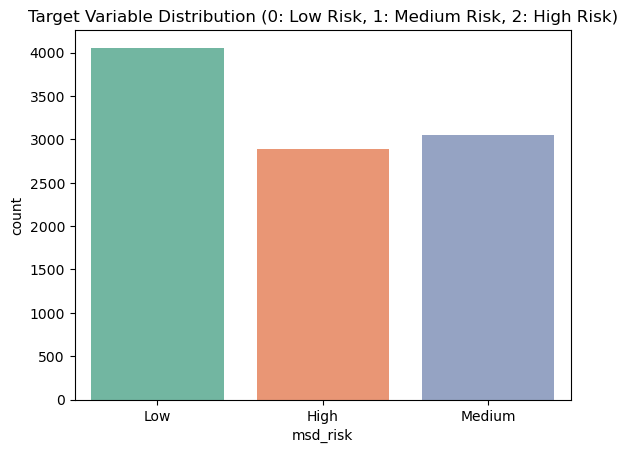

ValueError: could not convert string to float: 'Low'

<Figure size 1200x800 with 0 Axes>

In [358]:
# Describes the data
print(msdrd.describe())

# Vizualizes the distribution of the target variable
sns.countplot(x='msd_risk', data=msdrd, hue='msd_risk', palette='Set2', legend=False)
plt.title('Target Variable Distribution (0: Low Risk, 1: Medium Risk, 2: High Risk)')
plt.show()


# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(msdrd.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

# Split the Dataset

In [66]:
X = msdr_df.drop(columns=['msd_risk', 'Backpack Height_Slightly Lower', 'Backpack Height_On Buttocks', 'Backpack Height_Shoulder Blades to Lower Back', 'Gender_Male', 'Gender_Female'])
y = msdr_df['msd_risk']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

#le = LabelEncoder()
#y_train3 = le.fit_transform(y_train3)  # Fit only on training data
#y_test3 = le.transform(y_test3)  # Transform test data

print("\nShapes After Splitting:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Saves the preprocessed dataset to a csv file
X_train3.to_csv('X_train_msdrd.csv', index=False)
X_test3.to_csv('X_test_msdrd.csv', index=False)
y_train3.to_csv('y_train_msdrd.csv', index=False)
y_test3.to_csv('y_test_msdrd.csv', index=False)

print("\nPreprocessing Complete! Files saved.")


Shapes After Splitting:
X_train: (820, 13), X_test: (205, 13), y_train: (820,), y_test: (205,)

Preprocessing Complete! Files saved.


# Train the Model

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=150, max_depth=30, random_state=42, class_weight = 'balanced')
model.fit(X_train3, y_train3)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=150,
                       random_state=42)

# Evaluate the Model

In [78]:
# Predictions on training data
y_train_pred3 = model.predict(X_train3)

# Predictions on testing data
y_test_pred3 = model.predict(X_test3)

print("\nModel Performance:")

# Accuracy Scores
train_accuracy3 = accuracy_score(y_train3, y_train_pred3)
test_accuracy3 = accuracy_score(y_test3, y_test_pred3)

print(f"Training Accuracy: {train_accuracy3:.2f}")
print(f"Testing Accuracy: {test_accuracy3:.2f}")

# Classification Report (Precision, Recall, F1-score) for test Set
print("\nClassification Report (Test Set):")
print(classification_report(y_test3, y_test_pred3))

# Confusion Matrix for train set
print("\nConfusion Matrix (Train Set):")
print(confusion_matrix(y_train3, y_train_pred3))

# Confusion Matrix for test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test3, y_test_pred3))


Model Performance:
Training Accuracy: 0.91
Testing Accuracy: 0.36

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.31      0.27      0.29       594
           1       0.41      0.49      0.45       802
           2       0.32      0.28      0.30       604

    accuracy                           0.36      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.36      0.36      2000


Confusion Matrix (Train Set):
[[2144   75   74]
 [ 176 2906  174]
 [ 109   78 2264]]

Confusion Matrix (Test Set):
[[159 287 148]
 [194 396 212]
 [158 277 169]]


# Test Model - Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_test3, y_test3)
y_train_pred3 = log_model.predict(X_train3)
log_model.fit(X_train3, y_train3)
y_test_pred3 = log_model.predict(X_test3)

from sklearn.metrics import accuracy_score
print("Logistic Regression Train Accuracy:", accuracy_score(y_train3, y_train_pred3))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test3, y_test_pred3))

Logistic Regression Train Accuracy: 0.3965
Logistic Regression Test Accuracy: 0.401
